<a href="https://colab.research.google.com/github/chandrika1004/PRODIGY_DS_04/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prodigy Infotech Datascience Internship Task 4

#TASK: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

##Import necessary libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

##Loading the dataset

In [80]:
twitter=pd.read_csv('Twitter_Data.csv')
twitter

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [81]:
print(twitter.columns)

Index(['clean_text', 'category'], dtype='object')


##Basic data cleaning

In [82]:
twitter.info()
twitter.isnull().sum()
twitter=twitter.dropna(subset=['clean_text'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


##Sentiment Analysis using VADER

In [83]:
twitter=twitter.copy()
sia=SentimentIntensityAnalyzer()
twitter.loc[:,'category']=twitter['clean_text'].apply(lambda x:sia.polarity_scores(x)['compound'])
def get_sentiment(score):
  if score>0.05:
    return 'Positive'
  elif score<-0.05:
    return 'Negative'
  else:
    return 'Neutral'
twitter.loc[:,'sentiment']=twitter['category'].apply(get_sentiment)
twitter[['clean_text','category','sentiment']].head()

,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,0.5267,Positive
1,talk all the nonsense and continue all the dra...,-0.4019,Negative
2,what did just say vote for modi welcome bjp t...,0.7096,Positive
3,asking his supporters prefix chowkidar their n...,-0.0713,Negative
4,answer who among these the most powerful world...,0.4754,Positive


##Sentiment Distribution

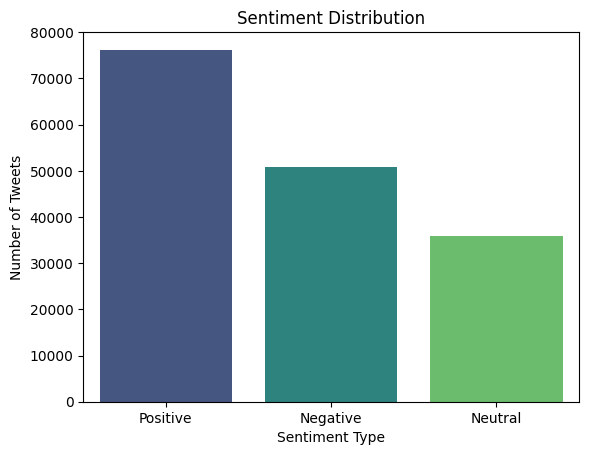

In [84]:
sns.countplot(x='sentiment',hue='sentiment',data=twitter,palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Tweets')
plt.show()

##WordCloud for Positive Tweets

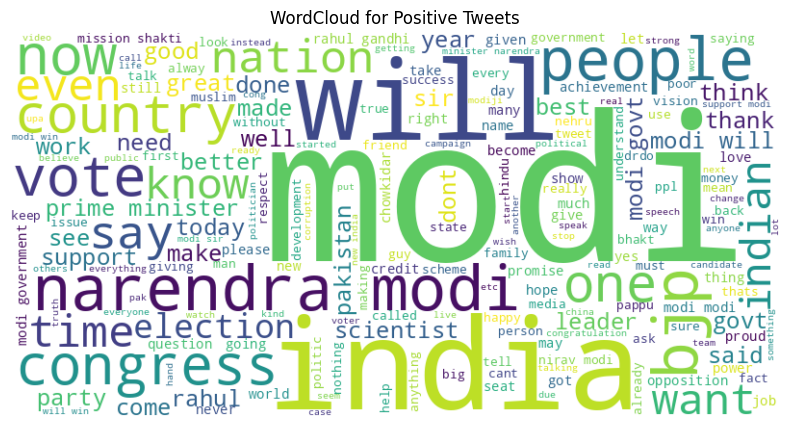

In [85]:
positive_tweets=twitter[twitter['sentiment']=='Positive']['clean_text'].astype(str).str.cat(sep='')
wordcloud=WordCloud(background_color='white',width=800,height=400,colormap='viridis').generate(positive_tweets)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Positive Tweets')
plt.show()